In [4]:
import pandas as pd
import CococoNet_reader
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import Name_resolver
import tqdm as tq

In [5]:
def get_ncbi_clean_og2gene_for_species(
    species_1, og2genes_only_cococonet, ncbi_mapping
):

    species_1_name = Name_resolver.species_name_resolver(
        species_1, desired_type="common"
    )

    first_species_ortho_groups = og2genes_only_cococonet.loc[
        og2genes_only_cococonet["Species"] == species_1
    ]
    shared_orthogroups = first_species_ortho_groups["Orthogroup"].unique()

    list_of_orthogene_pds = []
    for orthogroup in tq.tqdm(
        shared_orthogroups, desc="inner_loop", position=0, leave=False
    ):
        species_1_genes = (
            first_species_ortho_groups["Gene"]
            .loc[first_species_ortho_groups["Orthogroup"] == orthogroup]
            .to_list()
        )
        all_gene_combos = species_1_genes
        current_orthogroup_pd = pd.DataFrame(
            columns=[f"{species_1_name} OrthoGene"], data=all_gene_combos
        )
        current_orthogroup_pd["Orthogroup"] = orthogroup
        list_of_orthogene_pds.append(current_orthogroup_pd)

    final_species_lineup = pd.concat(list_of_orthogene_pds)
    ncbi_added_once = final_species_lineup.merge(
        right=ncbi_mapping[["Orthodb Gene", "Symbol"]],
        right_on="Orthodb Gene",
        left_on=f"{species_1_name} OrthoGene",
    )
    ncbi_added_once_clean = ncbi_added_once.drop(columns="Orthodb Gene")
    return ncbi_added_once_clean

In [6]:
og_groups = pd.read_csv(
    "/data/passala/OrthoDB_data/NCBI_data/merged_ncbi_to_orthodb_fixed_non_genesymbol_updated_poplar.csv"
)
og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,67026at3193,15368_0:000000,15368,3193.0,15368_0:000000,LOC100829170
1,7376at3193,15368_0:000001,15368,3193.0,15368_0:000001,LOC100840094
2,325723at3193,15368_0:000002,15368,3193.0,15368_0:000002,LOC100841678
3,117946at3193,15368_0:000003,15368,3193.0,15368_0:000003,LOC100844153
4,658893at3193,15368_0:000004,15368,3193.0,15368_0:000004,LOC100841477
...,...,...,...,...,...,...
615300,68168at3193,4577_0:0085a4,4577,3193.0,4577_0:0085a4,ZemaCp159
615301,868182at3193,4577_0:0085a5,4577,3193.0,4577_0:0085a5,rps19
615302,125785at3193,4577_0:0085a6,4577,3193.0,4577_0:0085a6,ZemaCp081
615303,866429at3193,4577_0:0085a7,4577,3193.0,4577_0:0085a7,petD


In [7]:
# og_groups = pd.read_csv(
#     "/data/passala/OrthoDB_data/NCBI_data/og_2_Genes_with_ncbi_symbol.csv"
# )
# og_groups

In [8]:
og_groups.loc[og_groups['Species'] == 3694]

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
69259,886815at3193,3694_0:000000,3694,3193.0,3694_0:000000,LOC7478672
69260,672493at3193,3694_0:000001,3694,3193.0,3694_0:000001,LOC7467060
69261,68793at3193,3694_0:000002,3694,3193.0,3694_0:000002,LOC7490712
69262,868336at3193,3694_0:000003,3694,3193.0,3694_0:000003,LOC18094411
69263,82261at3193,3694_0:000004,3694,3193.0,3694_0:000004,LOC7485683
...,...,...,...,...,...,...
97751,867634at3193,3694_0:007b69,3694,3193.0,3694_0:007b69,ndhC
97752,283564at3193,3694_0:007b6a,3694,3193.0,3694_0:007b6a,ndhB
97753,866726at3193,3694_0:007b6b,3694,3193.0,3694_0:007b6b,ndhH
97754,547686at3193,3694_0:007b6c,3694,3193.0,3694_0:007b6c,psbE


In [9]:
# ncbi_mapping = pd.read_csv(
#     "/data/passala/OrthoDB_data/NCBI_data/merged_ncbi_to_orthodb_fixed_non_genesymbol.csv"
# )

In [10]:
ncbi_mapping = pd.read_csv('/data/passala/OrthoDB_data/NCBI_data/merged_ncbi_to_orthodb_fixed_non_genesymbol_updated_poplar.csv')

In [11]:
ncbi_mapping

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,67026at3193,15368_0:000000,15368,3193.0,15368_0:000000,LOC100829170
1,7376at3193,15368_0:000001,15368,3193.0,15368_0:000001,LOC100840094
2,325723at3193,15368_0:000002,15368,3193.0,15368_0:000002,LOC100841678
3,117946at3193,15368_0:000003,15368,3193.0,15368_0:000003,LOC100844153
4,658893at3193,15368_0:000004,15368,3193.0,15368_0:000004,LOC100841477
...,...,...,...,...,...,...
615300,68168at3193,4577_0:0085a4,4577,3193.0,4577_0:0085a4,ZemaCp159
615301,868182at3193,4577_0:0085a5,4577,3193.0,4577_0:0085a5,rps19
615302,125785at3193,4577_0:0085a6,4577,3193.0,4577_0:0085a6,ZemaCp081
615303,866429at3193,4577_0:0085a7,4577,3193.0,4577_0:0085a7,petD


In [12]:
potato_og = get_ncbi_clean_og2gene_for_species(
    4113  , og_groups, ncbi_mapping=ncbi_mapping
)

In [13]:
medicago_og = get_ncbi_clean_og2gene_for_species(
    3880 , og_groups, ncbi_mapping=ncbi_mapping
)

In [14]:
potato_og.tail(110)

,potato OrthoGene,Orthogroup,Symbol
27645,4113_0:006db1,793469at3193,LOC107059362
27646,4113_0:006db6,794259at3193,LOC107059364
27647,4113_0:006db7,450317at3193,LOC102599708
27648,4113_0:006dbc,493238at3193,LOC102600693
27649,4113_0:006dc3,383012at3193,LOC107059372
...,...,...,...
27750,4113_0:006ebf,428302at3193,rpl2
27751,4113_0:006eb9,877757at3193,ccsA
27752,4113_0:006ebc,113185at3193,psbN
27753,4113_0:006ebe,7336at3193,psbF


In [15]:
medicago_og

,medicago OrthoGene,Orthogroup,Symbol
0,3880_0:000001,869151at3193,LOC11442228
1,3880_0:00449d,869151at3193,LOC11440291
2,3880_0:000002,874624at3193,LOC25483701
3,3880_0:000003,7641at3193,LOC25485140
4,3880_0:000199,7641at3193,LOC11434146
...,...,...,...
28197,3880_0:007c62,765756at3193,ccmB
28198,3880_0:007c63,28159at3193,ccmFn
28199,3880_0:007c64,331100at3193,rps3
28200,3880_0:007c65,138566at3193,rps4


In [16]:
list_of_non_single_gene_groups_potato = pd.Series(potato_og['Orthogroup'].value_counts().loc[potato_og['Orthogroup'].value_counts() >1])

In [17]:
list_of_non_single_gene_groups_medicago = pd.Series(medicago_og['Orthogroup'].value_counts().loc[medicago_og['Orthogroup'].value_counts() >1])

In [18]:
list_of_non_single_gene_groups_medicago

Orthogroup
677062at3193    59
875414at3193    50
1257at3193      49
572594at3193    48
741267at3193    41
                ..
69948at3193      2
574902at3193     2
889274at3193     2
889592at3193     2
737529at3193     2
Name: count, Length: 5818, dtype: int64

In [19]:
list_of_non_single_gene_groups_potato

Orthogroup
866404at3193    76
886969at3193    42
784291at3193    30
666261at3193    30
313296at3193    27
                ..
878918at3193     2
140292at3193     2
398537at3193     2
126431at3193     2
875232at3193     2
Name: count, Length: 5683, dtype: int64

In [20]:
potato_og = potato_og.loc[potato_og['Orthogroup'].isin(list_of_non_single_gene_groups_potato.index)]

In [21]:
medicago_og = medicago_og.loc[medicago_og['Orthogroup'].isin(list_of_non_single_gene_groups_medicago.index)]

In [22]:
medicago_og

,medicago OrthoGene,Orthogroup,Symbol
0,3880_0:000001,869151at3193,LOC11442228
1,3880_0:00449d,869151at3193,LOC11440291
3,3880_0:000003,7641at3193,LOC25485140
4,3880_0:000199,7641at3193,LOC11434146
5,3880_0:002c5e,7641at3193,LOC11431841
...,...,...,...
28155,3880_0:007c4c,867634at3193,nad3
28166,3880_0:007c3d,692014at3193,psbD
28167,3880_0:007c41,692014at3193,psbC
28169,3880_0:007c3f,870220at3193,rps12


In [23]:
medicago_csv = pd.read_csv('/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/medicago_reads.csv', index_col = 0)
medicago_csv = medicago_csv.T
medicago_csv

,medicago Cold Rep 1,medicago Cold Rep 2,medicago Cold Rep 3,medicago Hot Rep 1,medicago Hot Rep 2,medicago Hot Rep 3
LOC120575846,0,0,0,0,0,0
LOC120577382,0,0,0,0,0,0
LOC25481844,75,7,5,113,243,452
LOC11432805,49,81,120,7,34,27
LOC11424458,3,0,0,0,0,5
...,...,...,...,...,...,...
A0S16_gp19,5,12,3,4,12,4
A0S16_gp01,313,134,138,117,128,129
A0S16_gt14,0,0,0,0,0,0
A0S16_gt15,0,0,0,0,0,0


In [24]:
dict_version = medicago_og[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict = dict_version['Orthogroup']
medicago_csv = medicago_csv.groupby(by = true_dict).mean()

In [25]:
medicago_csv

,medicago Cold Rep 1,medicago Cold Rep 2,medicago Cold Rep 3,medicago Hot Rep 1,medicago Hot Rep 2,medicago Hot Rep 3
10147at3193,62.000000,63.500000,46.000000,51.000000,35.000000,68.000000
10648at3193,572.000000,418.500000,531.500000,510.500000,435.500000,432.000000
10772at3193,2423.666667,2455.000000,2155.666667,1477.333333,1508.666667,1558.666667
10950at3193,646.857143,325.285714,385.000000,1339.857143,1402.714286,1365.714286
109808at3193,11.000000,13.500000,14.750000,3.000000,4.000000,6.500000
...,...,...,...,...,...,...
9601at3193,270.500000,265.000000,294.500000,290.500000,385.500000,383.500000
9609at3193,74.000000,120.800000,104.600000,11.200000,30.800000,52.000000
9789at3193,1306.500000,1205.000000,1327.000000,1452.000000,1452.500000,1253.500000
9877at3193,760.500000,509.000000,578.000000,1294.000000,1316.500000,1317.000000


In [26]:
medicago_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Cold", "Cold", "Cold", "Hot", "Hot", "Hot"],
    index=[
        "medicago Cold Rep 1",
        "medicago Cold Rep 2",
        "medicago Cold Rep 3",
        "medicago Hot Rep 1",
        "medicago Hot Rep 2",
        "medicago Hot Rep 3",
    ],
)

In [27]:
combined_potato = pd.read_csv("/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/potato_reads.csv", index_col = 0)
combined_potato = combined_potato.T
combined_potato


,potato Hot Rep 1,potato Hot Rep 2,potato Hot Rep 3,potato Cold Rep 1,potato Cold Rep 2,potato Cold Rep 3
LOC102578245,1752,1331,766,598,222,171
LOC107059702,0,0,0,0,0,0
LOC107059723,0,0,0,0,0,0
LOC102578572,119,98,309,672,507,750
LOC107059737,0,0,0,0,0,0
...,...,...,...,...,...,...
LK299_pgt044,0,0,0,0,0,0
LK299_pgp004,0,0,0,0,0,0
LK299_pgt045,0,0,0,0,0,0
LK299_pgp003,0,0,0,0,0,0


In [28]:
dict_version = potato_og[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict = dict_version['Orthogroup']
combined_potato = combined_potato.groupby(by = true_dict).mean()
combined_potato

,potato Hot Rep 1,potato Hot Rep 2,potato Hot Rep 3,potato Cold Rep 1,potato Cold Rep 2,potato Cold Rep 3
10772at3193,4841.500000,5588.000000,5387.500000,3249.500000,1992.500,2668.500000
10950at3193,1937.875000,2616.000000,2450.625000,2518.875000,1992.375,2831.625000
109808at3193,6.000000,9.750000,45.000000,280.750000,165.500,215.250000
109841at3193,952.500000,1127.500000,1162.500000,1653.000000,1062.500,1574.000000
109843at3193,1271.000000,1380.000000,2063.500000,2208.000000,1310.000,2411.500000
...,...,...,...,...,...,...
9601at3193,924.000000,910.333333,1153.000000,1305.333333,1189.000,1485.000000
9609at3193,187.000000,159.400000,230.800000,182.400000,134.800,211.800000
9789at3193,1483.333333,2164.333333,1906.333333,952.666667,673.000,945.000000
9877at3193,9954.500000,12792.000000,8497.500000,3164.500000,2175.000,2766.000000


In [29]:
combined_potato = combined_potato.T
medicago_csv = medicago_csv.T

In [30]:
potato_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Hot", "Hot", "Hot","Cold","Cold", "Cold", ],
    index=[
        "potato Hot Rep 1",
        "potato Hot Rep 2",
        "potato Hot Rep 3",
        "potato Cold Rep 1",
        "potato Cold Rep 2",
        "potato Cold Rep 3",
    ],
)

In [31]:
combined_potato = combined_potato.round(0)
medicago_csv = medicago_csv.round(0)

In [32]:
genes_to_keep_medicago = medicago_csv.columns[medicago_csv.sum(axis=0) >= 100]
medicago_csv = medicago_csv[genes_to_keep_medicago]
inference_medicago = DefaultInference(n_cpus=30)
dds_medicago = DeseqDataSet(
    counts=medicago_csv,
    metadata=medicago_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference_medicago,
)
dds_medicago.deseq2()
stat_res_medicago = DeseqStats(dds_medicago, inference=inference_medicago)
stat_res_medicago.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.40 seconds.

Fitting dispersion trend curve...
... done in 0.13 seconds.

Fitting MAP dispersions...
... done in 0.44 seconds.

Fitting LFCs...
... done in 0.31 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
10147at3193     54.291411       -0.117070  0.404852 -0.289167  7.724537e-01   
10648at3193    481.390174       -0.101875  0.228706 -0.445441  6.560009e-01   
10772at3193   1920.494208       -0.603083  0.175218 -3.441905  5.776329e-04   
10950at3193    906.680064        1.659283  0.251089  6.608339  3.886565e-11   
109841at3193   106.107434        0.178142  0.244091  0.729817  4.655019e-01   
...                   ...             ...       ...       ...           ...   
9601at3193     313.615229        0.368683  0.220084  1.675191  9.389678e-02   
9609at3193      65.810657       -1.692337  0.566475 -2.987484  2.812839e-03   
9789at3193    1330.229507        0.142135  0.192551  0.738166  4.604135e-01   
9877at3193     959.082742        1.132814  0.179786  6.300919  2.958865e-10   
9942at3193    1237.708188       -0.205133  0.203070 -1.010160  3.124184e-01 

... done in 0.28 seconds.



In [33]:
genes_to_keep = combined_potato.columns[combined_potato.sum(axis=0) >= 100]
combined_potato = combined_potato[genes_to_keep]
inference = DefaultInference(n_cpus=30)
dds_potato = DeseqDataSet(
    counts=combined_potato,
    metadata=potato_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds_potato.deseq2()
stat_res_potato = DeseqStats(dds_potato, inference=inference)
stat_res_potato.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.38 seconds.

Fitting dispersion trend curve...
... done in 0.22 seconds.

Fitting MAP dispersions...
... done in 0.42 seconds.

Fitting LFCs...
... done in 0.44 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
10772at3193   3857.377618        0.888131  0.145522  6.103055  1.040602e-09   
10950at3193   2367.060410       -0.194772  0.133739 -1.456353  1.452952e-01   
109808at3193   122.181521       -3.637943  0.590380 -6.162040  7.181382e-10   
109841at3193  1243.775892       -0.518712  0.119204 -4.351460  1.352337e-05   
109843at3193  1738.062351       -0.448636  0.190996 -2.348924  1.882776e-02   
...                   ...             ...       ...       ...           ...   
9601at3193    1161.663834       -0.552685  0.146420 -3.774654  1.602301e-04   
9609at3193     181.484672        0.005716  0.214376  0.026661  9.787300e-01   
9789at3193    1315.529592        0.987404  0.156275  6.318359  2.643549e-10   
9877at3193    6385.884074        1.840567  0.221504  8.309407  9.618151e-17   
9942at3193    2534.119478        0.569649  0.121806  4.676685  2.915503e-06 

... done in 0.33 seconds.



In [34]:
full_results_potato = stat_res_potato.results_df
full_results_potato
full_medicago_results = stat_res_medicago.results_df

In [35]:
full_results_potato.to_csv('/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/potato_ortho_trimmed_out_2_gene_families.csv',)
full_medicago_results.to_csv('/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/medicago_ortho_trimmed_out_2_gene_families.csv',)


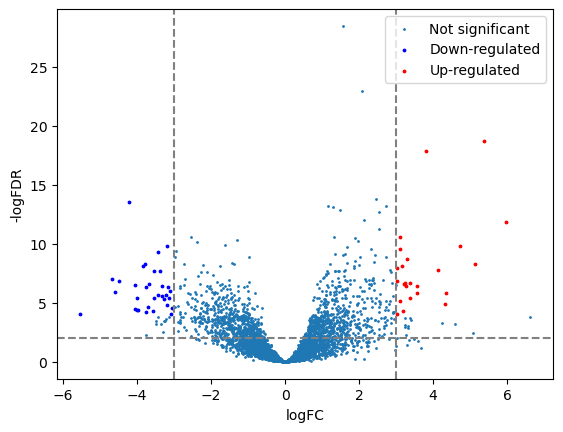

In [35]:
plt.scatter(
    x=full_medicago_results["log2FoldChange"],
    y=full_medicago_results["padj"].apply(lambda x: -np.log10(x)),
    s=1,
    label="Not significant",
)

# highlight down- or up- regulated genes
down_medicago = full_medicago_results[
    (full_medicago_results["log2FoldChange"] <= -3)
    & (full_medicago_results["padj"] <= 0.0001)
]
up_medicago = full_medicago_results[
    (full_medicago_results["log2FoldChange"] >= 3) & (full_medicago_results["padj"] <= 0.0001)
]

plt.scatter(
    x=down_medicago["log2FoldChange"],
    y=down_medicago["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Down-regulated",
    color="blue",
)
plt.scatter(
    x=up_medicago["log2FoldChange"],
    y=up_medicago["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Up-regulated",
    color="red",
)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3, color="grey", linestyle="--")
plt.axvline(3, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.legend()

In [ ]:
up_medicago

In [ ]:
plt.scatter(
    x=full_results["log2FoldChange"],
    y=full_results["padj"].apply(lambda x: -np.log10(x)),
    s=1,
    label="Not significant",
)

# highlight down- or up- regulated genes
down = full_results[
    (full_results["log2FoldChange"] <= -3) & (full_results["padj"] <= 0.0001)
]
up = full_results[
    (full_results["log2FoldChange"] >= 3) & (full_results["padj"] <= 0.0001)
]

plt.scatter(
    x=down["log2FoldChange"],
    y=down["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Down-regulated",
    color="blue",
)
plt.scatter(
    x=up["log2FoldChange"],
    y=up["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Up-regulated",
    color="red",
)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3, color="grey", linestyle="--")
plt.axvline(3, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.legend()

In [ ]:
up